#🎓 Aula: Intervalo de Confiança para Proporções

##📌 O que é uma proporção?

Uma proporção amostral é a fração de indivíduos da amostra que apresentam uma determinada característica.

Exemplo: Se, numa amostra de 100 pessoas, 60 disseram “sim” a uma pergunta, temos:

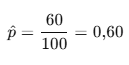

##📌 Para que serve o intervalo de confiança?

O intervalo de confiança (IC) nos permite estimar, com uma determinada confiança (ex: 95%), um intervalo plausível para a proporção populacional real (
𝑝
p), com base em uma amostra.

##✅ Exemplo

Um candidato em uma eleição com dois candidatos realiza uma pesquisa para determinar quem está na frente. O pesquisador escolhe aleatoriamente 500 eleitores registrados e determina que 260 dos 500 votantes são a favor do candidato. Em outras palavras, 0,52% da amostra é a favor do candidato.

In [1]:
from scipy.stats import norm

In [2]:
n = 500
p = 260 / n
n, p

(500, 0.52)

Embora esta estimativa pontual da proporção seja informativa, é importante calcular também um intervalo de confiança. O intervalo de confiança é calculado com base na média e no desvio-padrão da distribuição amostral de uma proporção.

## 📊 Fórmula do Intervalo de Confiança para Proporções

As fórmulas para esses dois parâmetros média e no desvio-padrão são mostradas abaixo:

$\mu_p = \pi$

$\sigma_p = \sqrt{\frac{\pi(1-\pi)}{N}}$

Como não conhecemos o parâmetro populacional $\pi$, usamos a proporção amostral $p$ como estimativa. O erro padrão estimado de $p$ é, portanto,

$s_p = \sqrt{\frac{p(1-p)}{N}}$

Começamos pegando nossa estatística ($p$) e criando um intervalo que varia $(Z_{95})(s_p)$ em ambas as direções, onde $Z_{95}$ é o número de desvios-padrão que se estendem da média de uma distribuição normal, necessários para conter 0,95 da área (consulte a seção sobre o intervalo de confiança para a média). O valor de $Z_{95}$ é calculado com a calculadora normal e é igual a 1,96.

In [3]:
z_95 = norm().ppf(0.975)
z_95

np.float64(1.959963984540054)

Em seguida, fazemos um pequeno ajuste para corrigir o fato de que a distribuição é discreta e não contínua.

$s_p$ é calculado conforme mostrado abaixo:

$s_p = \sqrt{\frac{0,52(1-0,52)}{500}}=0,0223$

In [4]:
s_p = (p * (1 - p) / n) ** 0.5
s_p

0.022342784070030305

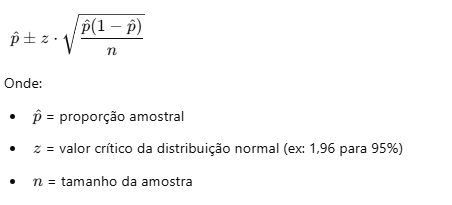

In [7]:
lower_limit = p - z_95 * s_p
upper_limit = p + z_95 * s_p
lower_limit, upper_limit

(np.float64(0.47620894790838536), np.float64(0.5637910520916146))

Com 95% de confiança, podemos afirmar que a proporção populacional real está entre 47,6% e 56,4%.

Ou seja, se repetíssemos esse processo de amostragem muitas vezes, 95% dos intervalos construídos incluiriam a verdadeira proporção da população.

Interpretação correta

* ❌ Errado: “Há 95% de chance que a proporção esteja nesse intervalo.”
* ✅ Certo: “Se repetirmos o experimento várias vezes, 95% dos intervalos conterão a verdadeira proporção.”

## 🧪 Correção da distribuição

**Para corrigir o fato de que estamos aproximando uma distribuição discreta com uma distribuição contínua (a distribuição normal), subtraímos $\frac{0,5}{N}$ do limite inferior e adicionamos $\frac{0,5}{N}$ ao limite superior do intervalo**. Portanto, o intervalo de confiança é

$p \pm Z_{95}\sqrt{\frac{p(1-p)}{N}} \pm \frac{0,5}{N}$

Limite inferior: $0,52 - (1,96)(0,0223) - 0,001 = 0,475$

Limite superior: $0,52 + (1,96)(0,0223) + 0,001 = 0,565$

$0,475 \leq \pi \leq 0,565$

In [5]:
lower_limit = p - z_95 * s_p - 0.5 / n
upper_limit = p + z_95 * s_p + 0.5 / n
lower_limit, upper_limit

(np.float64(0.47520894790838536), np.float64(0.5647910520916146))

Como o intervalo se estende por 0,045 em ambas as direções, a margem de erro é de 0,045.

Em termos percentuais, entre 47,5% e 56,5% dos eleitores são a favor do candidato, e a margem de erro é de 4,5%.

Lembre-se de que a margem de erro de 4,5% é a margem de erro para a porcentagem que favorece o candidato e não a margem de erro para a diferença entre a porcentagem que favorece o candidato e a porcentagem que favorece o oponente. A margem de erro para a diferença é de 9%, o dobro da margem de erro para a porcentagem individual. Lembre-se disso ao ouvir notícias na mídia; a mídia frequentemente erra nesse ponto.